In [33]:
# -*- coding: utf-8 -*-
import sys
import string

try:
    import xml.etree.cElementTree as ET
except ImportError:
    import xml.etree.ElementTree as ET

import struct
import numpy as np



def myint(x):
    # two bytes length
    # print(type(x), type(x[0]), type(ord(x[0])))

    # ans = ord(x[0])+(ord(x[1])<<8)

    ans = struct.unpack('h',x)[0]
    return ans

def mylong(x):
    # four bytes length
    if sys.version_info[0] > 2:
        ans = x[0] + (x[1]<<8) + (x[2]<<16) + (x[3]<<32)
    else:
        ans = ord(x[0]) + (ord(x[1])<<8) + (ord(x[2])<<16) + (ord(x[3])<<32)
    return ans

def myfloat(x):
    ans = struct.unpack('f',x)[0]
    # ans = ans[0]
    return ans

def mydouble(x):
    ans = struct.unpack('d',x)[0]
    # ans = ans[0]
    return ans

def mybyte(x):
    # will return an error if x is more than a byte length
    # TODO need to write error catch routine
    ans = ord(x)
    return ans

def mypass(x):
    return x

def myRGB(x):
    # three bytes with RGB values 
    # TODO need to write error catch routine
    R = x[0] if sys.version_info[0] > 2 else ord(x[0])
    G = x[1] if sys.version_info[0] > 2 else ord(x[1])
    B = x[2] if sys.version_info[0] > 2 else ord(x[2])

    ans = '#{:02x}{:02x}{:02x}'.format(R,G,B)
    return ans

def terminateStrOnZero (str):
    """Iterate through string and terminate on first zero
    """
    idx=0
    while idx < len(str) and str[idx] != '\00':
        idx += 1
    return str[:idx]

################################################################
class PTWFrameInfo:
  """Class to store the ptw file header information.
  """

  def __init__(self):

    """
        Initializes an object with several empty or zeroed properties. 

        These properties are used to store information from various sections of a 
        file's header and frame data, including name, signature, format, date and 
        time of file save, camera details, lens details, filter details, aperture 
        details, billet details, temperature details, pixel details, housing 
        temperature, serial number, threshold levels, unit details, lock details, 
        isoterm details, palette details, coordinates details, and other various 
        properties. 

        Args:
            self: The instance of the class.

        Returns:
            None
        """

    self.FileName = ''
    self.h_Signature = '' #[0:5]
    self.h_format = 'unknown'
    self.h_unit = ''
    self.h_Version = '' #[5:10]
    self.h_EofAsciiCode = 0 #[10]
    self.h_MainHeaderSize = 0 #[11:15]
    self.h_FrameHeaderSize = 0 #[15:19]
    self.h_SizeOfOneFrameAndHeader = 0 #[19:23]
    self.h_SizeOfOneFrame = 0 #[23:27]
    self.h_NumberOfFieldInFile = 0 #[27:31]
    self.h_CurrentFieldNumber = 0 #[31:35]

    #self.h_FileSaveDate = '' #[35:39]
    self.h_FileSaveYear = 0
    self.h_FileSaveMonth = 0
    self.h_FileSaveDay = 0

    #self.h_FileSaveTime = '' #[39:43]
    self.h_FileSaveHour = 0
    self.h_FileSaveMinute = 0
    self.h_FileSaveSecond = 0
    self.h_FileSaveCent = 0

    self.h_Millieme = 0 #[43:44]
    self.h_CameraName = '' #[44:64]
    self.h_LensName = '' #[64:84]
    self.h_FilterName = '' #[84:104]
    self.h_ApertureName = '' #[104:124]
    self.h_IRUSBilletSpeed = 0 #[124:128] # IRUS
    self.h_IRUSBilletDiameter = 0 #myfloat(headerinfo[128:132]) # IRUS
    self.h_IRUSBilletShape = 0 #myint(headerinfo[132:134]) #IRUS
    self.h_Emissivity = 0 #myfloat(headerinfo[141:145])
    self.h_Ambiant = 0 #myfloat(headerinfo[145:149])
    self.h_Distance = 0 #myfloat(headerinfo[149:153])
    self.h_IRUSInductorCoil = 0 #ord(everthing[153:154]) # IRUS
    self.h_IRUSInductorPower = 0 #mylong(headerinfo[154:158]) # IRUS
    self.h_IRUSInductorVoltage = 0 #myint(headerinfo[158:160]) # IRUS
    self.h_IRUSInductorFrequency = 0 #mylong(headerinfo[160:164]) # IRUS
    self.h_IRUSSynchronization = 0 #ord(headerinfo[169:170]) # IRUS
    self.h_AtmTransmission = 0 #myfloat(headerinfo[170:174])
    self.h_ExtinctionCoeficient = 0 #myfloat(headerinfo[174:178])
    self.h_Object = 0 #myint(headerinfo[178:180])
    self.h_Optic = 0 #myint(headerinfo[180:182])
    self.h_Atmo = 0 #myint(headerinfo[182:184])
    self.h_AtmosphereTemp = 0 #myfloat(headerinfo[184:188])
    self.h_CutOnWavelength = 0 #myfloat(headerinfo[188:192])
    self.h_CutOffWavelength = 0 #myfloat(headerinfo[192:196])
    self.h_PixelSize = 0 #myfloat(headerinfo[196:200])
    self.h_PixelPitch = 0 #myfloat(headerinfo[200:204])
    self.h_DetectorApperture = 0 #myfloat(headerinfo[204:208])
    self.h_OpticsFocalLength = 0 #myfloat(headerinfo[208:212])
    self.h_HousingTemperature1 = 0 #myfloat(headerinfo[212:216])
    self.h_HousingTemperature2 = 0 #myfloat(headerinfo[216:220])
    self.h_CameraSerialNumber = '' #headerinfo[220:231])
    self.h_MinimumLevelThreshold = 0 #myint(headerinfo[245:247])
    self.h_MaximumLevelThreshold = 0 #myint(headerinfo[247:249])
    self.h_EchelleSpecial = 0 #myint(headerinfo[277:279])
    self.h_EchelleUnit = 0 #headerinfo[279:289]
    self.h_EchelleValue = 0 #(headerinfo[289:357]) # 16 float values
    self.h_Units = ''
    self.h_Lockin = 0
    self.h_LockinGain = 0 #myfloat(headerinfo[357:361])
    self.h_LockinOffset = 0 #myfloat(headerinfo[361:365])
    self.h_HorizontalZoom = 0 #myfloat(headerinfo[365:369])
    self.h_VerticalZoom = 0 #myfloat(headerinfo[369:373])
    self.h_PixelsPerLine = 0 #myint(headerinfo[377:379])
    self.h_LinesPerField = 0 #myint(headerinfo[379:381])
    self.h_Rows = 0
    self.h_Cols = 0

    self.h_framepointer=1
    self.h_firstframe=1
    self.h_cliprect=[0,0,1,1]
    self.h_lastframe=0
    self.h_FrameSize = 0

    self.h_ADDynamic = 0 #myint(headerinfo[381:383])
    self.h_SATIRTemporalFrameDepth = 0 #myint(headerinfo[383:385]) # SATIR
    self.h_SATIRLocationLongitude = 0 #myfloat(headerinfo[385:389]) # SATIR
    self.h_SATIRLocationLatitude = 0 #myfloat(headerinfo[389:393]) # SATIR South is negative
    self.h_SATIRLocationAltitude = 0 #myfloat(headerinfo[393:397]) # SATIR
    self.h_ExternalSynch = 0 #ord(headerinfo[397]) # 1=External 0 = Internal
    self.h_CEDIPAquisitionPeriod = 0 #myfloat(headerinfo[403:407]) # CEDIP seconds
    self.h_CEDIPIntegrationTime = 0 #myfloat(headerinfo[407:411]) # CEDIP seconds
    self.h_WOLFSubwindowCapability = 0 #myint(headerinfo[411:413]) # WOLF
    self.h_ORIONIntegrationTime = 0 #myfloat(headerinfo[413:437]) # ORION (6 values)
    self.h_ORIONFilterNames = '' #headerinfo[437:557]) # ORION 6 fields of 20 chars each
    self.h_NucTable = 0 #myint(headerinfo[557:559])
    self.h_Reserve6 = '' #headerinfo[559:563]
    self.h_Comment = '' #headerinfo[563:1563]
    self.h_CalibrationFileName = '' #headerinfo[1563:1663]
    self.h_ToolsFileName = '' #headerinfo[1663:1919]
    self.h_PaletteIndexValid = 0 #ord(headerinfo[1919:1920])
    self.h_PaletteIndexCurrent = 0 #myint(1920:1922])
    self.h_PaletteToggle = 0 #ord(headerinfo[1922:1923])
    self.h_PaletteAGC = 0 #ord(headerinfo[1923:1924])
    self.h_UnitIndexValid = 0 #ord(headerinfo[1924:1925])
    self.h_CurrentUnitIndex = 0 #myint(headerinfo[1925:1927])
    self.h_ZoomPosition = 0 #(headerinfo[1927:1935]) # unknown format POINT
    self.h_KeyFrameNumber = 0 #ord(headerinfo[1935:1936])
    self.h_KeyFramesInFilm = 0 #headerinfo[1936:2056] # set of 30 frames
    self.h_PlayerLocked = 0 # ord(headerinfo[2057:2057])
    self.h_FrameSelectionValid = 0 #ord(headerinfo[2057:2058])
    self.h_FrameofROIStart = 0 #mylong(headerinfo[2058:2062])
    self.h_FrameofROIEnd = 0 #mylong(headerinfo[2062:2066])
    self.h_PlayerLockedROI = 0# ord(headerinfo[2066:2067])
    self.h_PlayerInfinitLoop = 0 #ord(headerinfo[2067:2068])
    self.h_PlayerInitFrame = 0 #mylong(headerinfo[2068:2072])

    self.h_Isoterm0Active = 0 #ord(headerinfo[2072:2073])
    self.h_Isoterm0DLMin = 0 #myint(headerinfo[2073:2075])
    self.h_Isoterm0DLMax = 0 #myint(headerinfo[2075:2077])
    self.h_Isoterm0Color = 0 #headerinfo[2077:2081]

    self.h_Isoterm1Active = 0 #ord(headerinfo[2081:2082])
    self.h_Isoterm1DLMin = 0 #myint(headerinfo[2082:2084])
    self.h_Isoterm1DLMax = 0 #myint(headerinfo[2084:2086])
    self.h_Isoterm1Color = 0 #headerinfo[2086:2090]

    self.h_Isoterm2Active = 0 #ord(headerinfo[2090:2091])
    self.h_Isoterm2DLMin = 0 #myint(headerinfo[2091:2093])
    self.h_Isoterm2DLMax = 0 #myint(headerinfo[2093:2095])
    self.h_Isoterm2Color = 0 #headerinfo[2095:2099]

    self.h_ZeroActive = 0 #ord(headerinfo[2099:2100])
    self.h_ZeroDL = 0 #myint(headerinfo[2100:2102])
    self.h_PaletteWidth = 0 #myint(headerinfo[2102:2104])
    self.h_PaletteFull = 0 #ord(headerinfo[2104:2105])
    self.h_PTRFrameBufferType = 0 #ord(headerinfo[2105:2106]) # 0=word 1=double
    self.h_ThermoElasticity = 0 #headerinfo[2106:2114] # type double (64 bits)
    self.h_DemodulationFrequency = 0 #myfloat(headerinfo[2114:2118])
    self.h_CoordinatesType = 0 #mylong(headerinfo[2118:2122])
    self.h_CoordinatesXorigin = 0 #mylong(headerinfo[2122:2126])
    self.h_CoordinatesYorigin = 0 #mylong(headerinfo[2126:2130])
    self.h_CoordinatesShowOrigin = 0 #ord(headerinfo[2130:2131])
    self.h_AxeColor = 0 #headerinfo[2131:2135]
    self.h_AxeSize = 0 #mylong(headerinfo[2135:2139])
    self.h_AxeValid = 0 #ord(headerinfo[2139:2140])
    self.h_DistanceOffset = 0 #myfloat(headerinfo[2140:2144])
    self.h_HistoEqualizationEnabled = 0 #ord(headerinfo[2144:2145])
    self.h_HistoEqualizationPercent = 0 #myint(headerinfo[2145:2147])
    self.h_CalibrationFileName = '' #headerinfo[2147:2403]
    self.h_PTRTopFrameValid = 0 #ord(headerinfo[2403:2404])
    self.h_SubSampling = 0 #myint(headerinfo[2404:2408])
    self.h_CameraHFlip = 0 #ord(headerinfo[2408:2409])
    self.h_CameraHVFlip = 0 #ord(headerinfo[2409:2410])
    self.h_BBTemp = 0 #myfloat(headerinfo[2410:2414])
    self.h_CaptureWheelIndex = 0 #ord(headerinfo[2414:2415])
    self.h_CaptureFocalIndex = 0 #ord(headerinfo[2415:2416])
    self.h_Reserved7 = '' #headerinfo[2416:3028]
    self.h_Reserved8 = '' #headerinfo[3028:3076]
    self.h_Framatone = 0 #ord(headerinfo[3076:3077]

    # Container for a single frame
    self.data = []
    self.minval = 0
    self.maxval = 0

    # Frame time
    self.h_frameMinute = 0 #FrameHeader[80:81]
    self.h_frameHour = 0 #FrameHeader[81:82]
    self.h_frameSecond = 0 #h_second+(h_thousands+h_hundred)/1000.0

    # detector / FPA temperature
    self.h_detectorTemp = 0.0 #FrameHeader[228:232]
    self.h_sensorTemp4 = 0.0 #FrameHeader[232:236]

# End of header definition

################################################################

def readPTWHeader(ptwfilename):
    """Given a ptw filename, read the header and return the header to caller

    Args:
        | filename (string) with full path to the ptw file.

    Returns:
        | Header (class) containing all PTW header information.

    Raises:
        | No exception is raised.

    Reference:
       h_variables of the header and byte positions are obtained
       from DL002U-D Altair Reference Guide
     """


    # Define the variables holding the header values
    headerinfo = '' #the vector holding the file header
    Header = PTWFrameInfo()

    # Read file to get the header size
    Header.FileName = ptwfilename
    fid = open(ptwfilename,'rb')
    headerinfo = fid.read(16)
    fid.close()
    MainHeaderSize = mylong(headerinfo[11:15])

    # Open file again and read the header information using the header size
    fid = open(ptwfilename,'rb')
    headerinfo = fid.read(MainHeaderSize)

    if sys.version_info[0] > 2:
        Header.h_Signature = headerinfo[0:3].decode('utf-8')
    else:
        Header.h_Signature = headerinfo[0:3]
    if Header.h_Signature == 'AIO': #AGEMA
        Header.h_format = 'agema'
    elif Header.h_Signature == 'CED':
        Header.h_format = 'cedip'
        Header.h_unit = 'dl'

    if sys.version_info[0] > 2:
        Header.h_Version = headerinfo[5:10].decode('utf-8')
    else:
        Header.h_Version = headerinfo[5:10]
    if not Header.h_Version[-1] in string.printable:
        Header.h_Version =  Header.h_Version[:-1]
    Header.h_EofAsciiCode = mybyte(headerinfo[10:11])
    Header.h_MainHeaderSize = mylong(headerinfo[11:15])
    Header.h_FrameHeaderSize = mylong(headerinfo[15:19])
    Header.h_SizeOfOneFrameAndHeader = mylong(headerinfo[19:23])
    Header.h_SizeOfOneFrame = mylong(headerinfo[23:27])
    Header.h_NumberOfFieldInFile = mylong(headerinfo[27:31])
    # Header.h_CurrentFieldNumber = myint(headerinfo[31:35])
    Header.h_CurrentFieldNumber = mylong(headerinfo[31:35])

    #Header.h_FileSaveDate = '' #[35:39] decoded below
    Header.h_FileSaveYear = myint(headerinfo[35:37])
    Header.h_FileSaveDay = ord(headerinfo[37:38])
    Header.h_FileSaveMonth = ord(headerinfo[38:39])

    #Header.h_FileSaveTime = '' #[39:43] decoded below
    Header.h_FileSaveMinute = ord(headerinfo[39:40])
    Header.h_FileSaveHour = ord(headerinfo[40:41])
    Header.h_FileSaveCent = ord(headerinfo[41:42])
    Header.h_FileSaveSecond = ord(headerinfo[42:43])

    Header.h_Millieme = ord(headerinfo[43:44])


    if sys.version_info[0] > 2:
        stripchar = terminateStrOnZero(headerinfo[44:64]).decode('utf-8')[-1]
        Header.h_CameraName = terminateStrOnZero(headerinfo[44:64]).decode('utf-8').rstrip(stripchar)
        Header.h_LensName = terminateStrOnZero(headerinfo[64:84]).decode('utf-8').rstrip(stripchar)
        Header.h_FilterName = terminateStrOnZero(headerinfo[84:104]).decode('utf-8').rstrip(stripchar)
        Header.h_ApertureName = terminateStrOnZero(headerinfo[104:124]).decode('utf-8').rstrip(stripchar)
    else:
        Header.h_CameraName = terminateStrOnZero(headerinfo[44:64])
        Header.h_LensName = terminateStrOnZero(headerinfo[64:84])
        Header.h_FilterName = terminateStrOnZero(headerinfo[84:104])
        Header.h_ApertureName = terminateStrOnZero(headerinfo[104:124])

    Header.h_IRUSBilletSpeed = myfloat(headerinfo[124:128]) # IRUS
    Header.h_IRUSBilletDiameter = myfloat(headerinfo[128:132]) # IRUS
    Header.h_IRUSBilletShape = myint(headerinfo[132:134]) #IRUS
    Header.h_Reserved134 = headerinfo[134:141]
    Header.h_Emissivity = myfloat(headerinfo[141:145])
    Header.h_Ambiant = myfloat(headerinfo[145:149])
    Header.h_Distance = myfloat(headerinfo[149:153])
    Header.h_IRUSInductorCoil = ord(headerinfo[153:154]) # IRUS
    Header.h_IRUSInductorPower = mylong(headerinfo[154:158]) # IRUS
    Header.h_IRUSInductorVoltage = myint(headerinfo[158:160]) # IRUS
    Header.h_IRUSInductorFrequency = mylong(headerinfo[160:164]) # IRUS
    Header.h_Reserved164 = headerinfo[164:169]
    Header.h_IRUSSynchronization = ord(headerinfo[169:170]) # IRUS
    Header.h_AtmTransmission = myfloat(headerinfo[170:174])
    Header.h_ExtinctionCoeficient = myfloat(headerinfo[174:178])
    Header.h_Object = myint(headerinfo[178:180])
    Header.h_Optic = myint(headerinfo[180:182])
    Header.h_Atmo = myint(headerinfo[182:184])
    Header.h_AtmosphereTemp = myfloat(headerinfo[184:188])
    Header.h_CutOnWavelength = myfloat(headerinfo[188:192])
    Header.h_CutOffWavelength = myfloat(headerinfo[192:196])
    Header.h_PixelSize = myfloat(headerinfo[196:200])
    Header.h_PixelPitch = myfloat(headerinfo[200:204])
    Header.h_DetectorApperture = myfloat(headerinfo[204:208])
    Header.h_OpticsFocalLength = myfloat(headerinfo[208:212])
    Header.h_HousingTemperature1 = myfloat(headerinfo[212:216])
    Header.h_HousingTemperature2 = myfloat(headerinfo[216:220])
    if sys.version_info[0] > 2:
        stripchar = terminateStrOnZero(headerinfo[220:231]).decode('utf-8')[-1]
        Header.h_CameraSerialNumber = terminateStrOnZero(headerinfo[220:231]).decode('utf-8').rstrip(stripchar)
    else:
        Header.h_CameraSerialNumber = terminateStrOnZero(headerinfo[220:231])
        
        
    Header.h_Reserved231 = headerinfo[231:239]
    Header.h_DetectorCode1 = myint(headerinfo[239:241])
    Header.h_DetectorCode2 = myint(headerinfo[241:243])
    Header.h_DetectorGain = myint(headerinfo[245:247])

    
    
    Header.h_MinimumLevelThreshold = myint(headerinfo[245:247])
    Header.h_MaximumLevelThreshold = myint(headerinfo[247:249])
    Header.h_EchelleSpecial = myint(headerinfo[277:279])
    Header.h_EchelleUnit = headerinfo[279:289]
    Header.h_EchelleValue = headerinfo[289:357] # 16 float values

    if(Header.h_EchelleSpecial==0):
        Header.h_Units='dl' # [dl T rad]
    else:
        Header.h_Units= Header.h_EchelleUnit # [dl T rad]

    Header.h_LockinGain = myfloat(headerinfo[357:361])
    Header.h_LockinOffset = myfloat(headerinfo[361:365])
    Header.h_HorizontalZoom = myfloat(headerinfo[365:369])
    Header.h_VerticalZoom = myfloat(headerinfo[369:373])

    Header.h_PixelsPerLine = myint(headerinfo[377:379])
    Header.h_LinesPerField = myint(headerinfo[379:381])
    if Header.h_LinesPerField==0:
        Header.h_LinesPerField=128
    if Header.h_PixelsPerLine==0:
        Header.h_PixelsPerLine=128

    Header.h_Rows = Header.h_LinesPerField
    Header.h_Cols = Header.h_PixelsPerLine

    Header.h_cliprect = [0,0,Header.h_Cols-1,Header.h_Rows-1]
    Header.h_lastframe = Header.h_NumberOfFieldInFile
    Header.h_FrameSize = Header.h_FrameHeaderSize + Header.h_Cols * Header.h_Rows * 2

    Header.h_ADDynamic = myint(headerinfo[381:383])
    Header.h_SATIRTemporalFrameDepth = myint(headerinfo[383:385]) # SATIR
    Header.h_SATIRLocationLongitude = myfloat(headerinfo[385:389]) # SATIR
    Header.h_SATIRLocationLatitude = myfloat(headerinfo[389:393]) # SATIR South is negative
    Header.h_SATIRLocationAltitude = myfloat(headerinfo[393:397]) # SATIR
    if sys.version_info[0] > 2:
        Header.h_ExternalSynch = headerinfo[397] # 1=External 0 = Internal
    else:
        Header.h_ExternalSynch = ord(headerinfo[397]) # 1=External 0 = Internal

    Header.h_CEDIPAquisitionPeriod = myfloat(headerinfo[403:407]) # CEDIP seconds
    Header.h_CEDIPIntegrationTime = myfloat(headerinfo[407:411]) # CEDIP seconds
    Header.h_WOLFSubwindowCapability = myint(headerinfo[411:413]) # WOLF
    Header.h_ORIONIntegrationTime = headerinfo[413:437] # ORION (6 values)
    Header.h_ORIONFilterNames = headerinfo[437:557] # ORION 6 fields of 20 chars each
    Header.h_NucTable = myint(headerinfo[557:559])
    Header.h_Reserve6 = headerinfo[559:563]
    if sys.version_info[0] > 2:
        stripchar = terminateStrOnZero(headerinfo[563:1563]).decode('utf-8')[-1]
        Header.h_Comment = terminateStrOnZero(headerinfo[563:1563]).decode('utf-8').rstrip(stripchar)
        stripchar = terminateStrOnZero(headerinfo[1563:1663]).decode('utf-8')[-1]
        Header.h_CalibrationFileName = terminateStrOnZero(headerinfo[1563:1663]).decode('utf-8').rstrip(stripchar)
        stripchar = terminateStrOnZero(headerinfo[1663:1919]).decode('utf-8')[-1]
        Header.h_ToolsFileName = terminateStrOnZero(headerinfo[1663:1919]).decode('utf-8').rstrip(stripchar)
    else:
        Header.h_Comment = terminateStrOnZero(headerinfo[563:1563])
        Header.h_CalibrationFileName = terminateStrOnZero(headerinfo[1563:1663])
        Header.h_ToolsFileName = terminateStrOnZero(headerinfo[1663:1919])

    Header.h_PaletteIndexValid = ord(headerinfo[1919:1920])
    Header.h_PaletteIndexCurrent = myint(headerinfo[1920:1922])
    Header.h_PaletteToggle = ord(headerinfo[1922:1923])
    Header.h_PaletteAGC = ord(headerinfo[1923:1924])
    Header.h_UnitIndexValid = ord(headerinfo[1924:1925])
    Header.h_CurrentUnitIndex = myint(headerinfo[1925:1927])
    if sys.version_info[0] > 2:
        stripchar = terminateStrOnZero(headerinfo[1927:1935]).decode('utf-8', errors='ignore')[-1]
        Header.h_ZoomPosition = terminateStrOnZero(headerinfo[1927:1935]).decode('utf-8', errors='ignore').rstrip(stripchar) # unknown format POINT
        Header.h_KeyFramesInFilm = terminateStrOnZero(headerinfo[1936:2056]).decode('utf-8', errors='ignore').rstrip(stripchar) # set of 30 frames
    else:
        Header.h_ZoomPosition = terminateStrOnZero(headerinfo[1927:1935]) # unknown format POINT
        Header.h_KeyFramesInFilm = terminateStrOnZero(headerinfo[1936:2056]) # set of 30 frames
    Header.h_KeyFrameNumber = ord(headerinfo[1935:1936])
    Header.h_PlayerLocked =  ord(headerinfo[2056:2057])
    Header.h_FrameSelectionValid = ord(headerinfo[2057:2058])
    Header.h_FrameofROIStart = mylong(headerinfo[2058:2062])
    Header.h_FrameofROIEnd = mylong(headerinfo[2062:2066])
    Header.h_PlayerLockedROI =  ord(headerinfo[2066:2067])
    Header.h_PlayerInfinitLoop = ord(headerinfo[2067:2068])
    Header.h_PlayerInitFrame = mylong(headerinfo[2068:2072])

    Header.h_Isoterm0Active = ord(headerinfo[2072:2073])
    Header.h_Isoterm0DLMin = myint(headerinfo[2073:2075])
    Header.h_Isoterm0DLMax = myint(headerinfo[2075:2077])
    Header.h_Isoterm0Color = myRGB(headerinfo[2077:2081])

    Header.h_Isoterm1Active = ord(headerinfo[2081:2082])
    Header.h_Isoterm1DLMin = myint(headerinfo[2082:2084])
    Header.h_Isoterm1DLMax = myint(headerinfo[2084:2086])
    Header.h_Isoterm1Color = myRGB(headerinfo[2086:2090])

    Header.h_Isoterm2Active = ord(headerinfo[2090:2091])
    Header.h_Isoterm2DLMin = myint(headerinfo[2091:2093])
    Header.h_Isoterm2DLMax = myint(headerinfo[2093:2095])
    Header.h_Isoterm2Color = myRGB(headerinfo[2095:2099])

    Header.h_ZeroActive = ord(headerinfo[2099:2100])
    Header.h_ZeroDL = myint(headerinfo[2100:2102])
    Header.h_PaletteWidth = myint(headerinfo[2102:2104])
    Header.h_PaletteFull = ord(headerinfo[2104:2105])
    Header.h_PTRFrameBufferType = ord(headerinfo[2105:2106]) # 0=word 1=double
    Header.h_ThermoElasticity = mydouble(headerinfo[2106:2114]) # type double (64 bits)
    Header.h_DemodulationFrequency = myfloat(headerinfo[2114:2118])
    Header.h_CoordinatesType = mylong(headerinfo[2118:2122])
    Header.h_CoordinatesXorigin = mylong(headerinfo[2122:2126])
    Header.h_CoordinatesYorigin = mylong(headerinfo[2126:2130])
    Header.h_CoordinatesShowOrigin = ord(headerinfo[2130:2131])
    Header.h_AxeColor = myRGB(headerinfo[2131:2135])
    Header.h_AxeSize = mylong(headerinfo[2135:2139])
    Header.h_AxeValid = ord(headerinfo[2139:2140])
    Header.h_DistanceOffset = myfloat(headerinfo[2140:2144])
    Header.h_HistoEqualizationEnabled = ord(headerinfo[2144:2145])
    Header.h_HistoEqualizationPercent = myint(headerinfo[2145:2147])
    if sys.version_info[0] > 2:
        stripchar = terminateStrOnZero(headerinfo[2147:2403]).decode('utf-8', errors='ignore')[-1]
        Header.h_CalibrationFileName = terminateStrOnZero(headerinfo[2147:2403]).decode('utf-8', errors='ignore').rstrip(stripchar)
    else:
        Header.h_CalibrationFileName = terminateStrOnZero(headerinfo[2147:2403])


    Header.h_PTRTopFrameValid = ord(headerinfo[2403:2404])
    # Header.h_SubSampling = myint(headerinfo[2404:2408])
    Header.h_SubSampling = mylong(headerinfo[2404:2408])
    Header.h_CameraHFlip = ord(headerinfo[2408:2409])
    Header.h_CameraHVFlip = ord(headerinfo[2409:2410])
    Header.h_BBTemp = myfloat(headerinfo[2410:2414])
    Header.h_CaptureWheelIndex = ord(headerinfo[2414:2415])
    Header.h_CaptureFocalIndex = ord(headerinfo[2415:2416])
    Header.h_Reserved7 = headerinfo[2416:3028]
    Header.h_Reserved8 = headerinfo[3028:3076]
    Header.h_Framatone = ord(headerinfo[3076:3077])

    # Read the first video frame info, not the data
    # to determine lockin information

    fid.seek(Header.h_MainHeaderSize,0)#,'bof')  %skip main header
    fid.seek(Header.h_FrameHeaderSize,1)#'cof')  %skip frame header
    firstline = fid.read(Header.h_Cols)#, 'uint16')  %read one line

    # look if first line contains lockin information
    if(firstline[1:4]==[1220,3907,1204,2382]):
        Header.h_Lockin=1
        Header.h_Rows=Header.h_Rows-1
        print ('* LOCKIN')
    else:
        Header.h_Lockin=0

    fid.close()

    return Header

################################################################
def GetPTWFrameFromFile(header):
    """From the ptw file, load the frame specified in the header variable
       header.h_framepointer

    Args:
        | header (class object) header of the ptw file, with framepointer set

    Returns:
        | header.data plus newly added information:
          requested frame DL values, dimensions (rows,cols)

    Raises:
        | No exception is raised.
    """

    # for debugging
    #print ('.....Loading frame', header.m_framepointer , 'from', header.m_filename,'.....')
    #print (header.m_cols,'x', header.m_rows, 'data points')

    fid = open(header.FileName,'rb')
    # skip main header
    fid.seek (header.h_MainHeaderSize,0)  #bof

    # for debugging
    #print ('EndHeader =',fid.tell())

    if(header.h_Lockin): # lockin -> skip first line
        fid.seek ((header.h_framepointer-1) * (header.h_FrameSize + 2*header.h_Cols),1)#, 'cof'
    else:
        fid.seek ((header.h_framepointer-1) * (header.h_FrameSize),1)#, 'cof'

    # for debugging
    #print ('StartFrameHeader =',fid.tell())

    #fid.seek(header.m_FrameHeaderSize,1)#,'cof') #skip frame header
    FrameHeader = fid.read(header.h_FrameHeaderSize)

    #Get the frame time
    header.h_frameMinute = ord(FrameHeader[80:81])
    header.h_frameHour = ord(FrameHeader[81:82])
    h_hundred = ord(FrameHeader[82:83])*10
    h_second = ord(FrameHeader[83:84])
    h_thousands = ord(FrameHeader[160:161])
    header.h_frameSecond = h_second+(h_hundred+h_thousands)/1000.0
	#detector FPA temperature
    header.h_detectorTemp = myfloat(FrameHeader[228:232]) 
    header.h_sensorTemp4 = myfloat(FrameHeader[232:236]) 
    if header.h_sensorTemp4 is None:
        header.h_sensorTemp4 = 0.0
    if header.h_detectorTemp is None:
        header.h_detectorTemp = 0.0

    # for debugging
    #print ('Start FrameData at',fid.tell())

    header.data = np.eye(header.h_Cols, header.h_Rows)

    #datapoints = header.m_cols * header.m_rows
    for y in range(header.h_Rows):
        for x in range(header.h_Cols):
            header.data[x][y] = myint(fid.read(2))

    # for debugging
    #print ('Data read',len(header.m_data), 'points')
    #print ('End FrameData at',fid.tell())

    # if a special scale is given then transform the data
    if(header.h_EchelleSpecial):
        low = min(header.h_EchelleScaleValue)
        high = max(header.h_EchelleScaleValue)
        header.data = header.data * (high-low)/ 2.0**16 + low
        #clear low high
    if(header.h_Lockin): # lockin -> skip first line
        header.h_cliprect = [0,1,header.h_Cols-1,header.h_Rows]

    header.h_minval = header.data.min()
    header.h_maxval = header.data.max()

    # for debugging
    #print ('DL values min', header.m_minval)
    #print ('DL values max', header.m_maxval)

    fid.close()  #close file
    return header

################################################################
def getPTWFrame (header, frameindex):
    """Retrieve a single PTW frame, given the header and frame index

    This routine also stores the data array as part of the header. This may
    change - not really needed to have both a return value and header stored
    value for the DL valueheader. This for a historical reason due to the way
    GetPTWFrameFromFile was written.  

    The contents of the header is changed (new information added: frame time 
    and detector temperature).  The header is returned from the function to
    make it explicit that the contents have changed from the header passed into
    the function.

    Args:
        | header (class object)
        | frameindex (integer): The frame to be extracted

    Returns:
        | header.data (np.ndarray): requested frame DL values, dimensions (rows,cols)
        | header (class): updated header now with frame time and FPA temperature

    Raises:
        | No exception is raised.
    """

    # Check if this is  a cedip file
    errorresult = np.asarray([0])
    if header.h_format!='cedip':
        print('ReadJade Error: file format is not supported')
        return errorresult
    if (frameindex <= header.h_lastframe):
        if frameindex>0:
            header.h_framepointer = frameindex
            header = GetPTWFrameFromFile(header)
        else:
            print ('frameindex smaller than 0')
            return errorresult
    else:                           # frameindex exceeds no of frames
        print ('ReadJade Error: cannot load frame. Frameindex exceeds sequence length.')
        return errorresult

    return header.data.conj().transpose(), header


################################################################
def getPTWFrames (header, loadFrames=[]):
    """Retrieve a number of PTW frames, given in a list of frameheader.
    The function returns the image data as well as the file and image header 
    data (time and FPA temperature) valid for the particular frame.
    The frame header data is written in the same class as is the file
    header, in order to keep all the information together for the frame.

    Args:
        | header (class object)
        | loadFrames ([int]): List of indices for frames to be extracted

    Returns:
        | data (np.ndarray): requested image frame DL values, dimensions (frames,rows,cols)
        | fheaders (object): requested image frame header values

    Raises:
        | No exception is raised.
    """

    fheaders = []

    # error checking on inputs
    errorresult = np.asarray([0])
    # Check if this is  a cedip file
    if header.h_format!='cedip':
        print('getPTWFrames Error: file format is not supported')
        return errorresult,None
    #check for legal frame index values
    npFrames = np.asarray(loadFrames)
    if np.any( npFrames < 1 ) or np.any ( npFrames > header.h_lastframe ):
        print('getPTWFrames Error: at least one requested frame not in file')
        print('legal frames for this file are: {0} to {1}'.format(1,header.h_lastframe))
        return errorresult, None

    data, headerx = getPTWFrame (header, loadFrames[0])
    fheaders.append(headerx)

    for frame in loadFrames[1:]:
        datax, headerx = getPTWFrame (header, frame)
        data = np.concatenate((data, datax))
        fheaders.append(headerx)

    rows = header.h_Rows
    cols = header.h_Cols

    return data.reshape(len(loadFrames), rows ,cols), fheaders


################################################################
def showHeader(Header):
    """Utility function to print the PTW header information to stdout

    Args:
        | header (class object) ptw file header structure

    Returns:
        | None

    Raises:
        | No exception is raised.
    """

    print('{} version {}'.format(Header.h_Signature, Header.h_Version))
    print('Main Header Size {}'.format(Header.h_MainHeaderSize))
    print('Frame Header Size {}'.format(Header.h_FrameHeaderSize))
    print('Frame + Frame Header Size {}'.format(Header.h_SizeOfOneFrameAndHeader))
    print('Frame Size {}'.format(Header.h_SizeOfOneFrame))
    print('Number of Frames {}'.format(Header.h_NumberOfFieldInFile))
    #print Header.h_CurrentFieldNumber

    print('Year {} Month {} Day {}'.format(Header.h_FileSaveYear, Header.h_FileSaveMonth, 
        Header.h_FileSaveDay))
    print('( {} / {} / {} )'.format(str(Header.h_FileSaveYear).zfill(2), 
        str(Header.h_FileSaveMonth).zfill(2), str(Header.h_FileSaveDay).zfill(2)))
    print('Hour {} Minute {} Second {}'.format(Header.h_FileSaveHour,Header.h_FileSaveMinute,
        Header.h_FileSaveSecond))
    print('( {} : {} : {} )'.format(str(Header.h_FileSaveHour).zfill(2),
        str(Header.h_FileSaveMinute).zfill(2),str(Header.h_FileSaveSecond).zfill(2)))

    #print Header.h_Millieme
    print ('Camera Name {}'.format(Header.h_CameraName))
    print ('Detector Code1 {}'.format(Header.h_DetectorCode1))
    print ('Detector Code2 {}'.format(Header.h_DetectorCode2))
    print ('Detector Gain {}'.format(Header.h_DetectorGain))

    print ('Lens {}'.format(Header.h_LensName))
    print ('Filter {}'.format(Header.h_FilterName))
    print ('Aperture Name {}'.format( Header.h_ApertureName))
    if Header.h_Signature == 'IRUS':
        print ('{}'.format(Header.h_IRUSBilletSpeed))
        print ('{}'.format(Header.h_IRUSBilletDiameter))
        print ('{}'.format(Header.h_IRUSBilletShape))
    print ('Emissivity {:.6f}'.format(Header.h_Emissivity))
    print ('Ambient Temperature {:.6f} (K)'.format(Header.h_Ambiant))
    print ('Ambient Temperature {:.6f} (degC)'.format(Header.h_Ambiant-273.15))
    print ('Distance to target {}'.format(Header.h_Distance))
    if Header.h_Signature == 'IRUS':
        print ('{}'.format(Header.h_IRUSInductorCoil))
        print ('{}'.format(Header.h_IRUSInductorPower))
        print ('{}'.format(Header.h_IRUSInductorVoltage))
        print ('{}'.format(Header.h_IRUSInductorFrequency))
        print ('{}'.format(Header.h_IRUSSynchronization))
    print ('Atm Transmission {}'.format(Header.h_AtmTransmission))
    print ('Ext Coef {}'.format(Header.h_ExtinctionCoeficient))
    print ('Target {}'.format(Header.h_Object))
    print ('Optic {}'.format(Header.h_Optic))
    print ('Atmo {}'.format(Header.h_Atmo))
    print ('Atm Temp {:.6f}'.format(Header.h_AtmosphereTemp))
    print ('Cut on Wavelength {:.6f}'.format(Header.h_CutOnWavelength))
    print ('Cut off Wavelength {:.6f}'.format(Header.h_CutOffWavelength))
    print ('PixelSize {}'.format(Header.h_PixelSize))
    print ('PixelPitch {}'.format(Header.h_PixelPitch))
    print ('Detector Apperture {}'.format(Header.h_DetectorApperture))
    print ('Optic Focal Length {}'.format(Header.h_OpticsFocalLength))
    print ('Housing Temp1 {:.6f} (K)'.format(Header.h_HousingTemperature1))
    print ('Housing Temp2 {:.6f} (K)'.format(Header.h_HousingTemperature2))

    print ('Sensor Temp4 {:.6f} (K)'.format(Header.h_sensorTemp4))
    print ('Detector/FPA Temp {:.6f} (K)'.format(Header.h_detectorTemp))
    
    print ('Camera Serial Number {}'.format(Header.h_CameraSerialNumber))
    print ('Min Threshold {}'.format(Header.h_MinimumLevelThreshold))
    print ('Max Threshold {}'.format(Header.h_MaximumLevelThreshold))
    #print Header.h_EchelleSpecial
    #print Header.h_EchelleUnit
    #print Header.h_EchelleValue
    print ('Gain {}'.format(Header.h_LockinGain))
    print ('Offset {}'.format(Header.h_LockinOffset))
    print ('HZoom {}'.format(Header.h_HorizontalZoom))
    print ('VZoom {}'.format(Header.h_VerticalZoom))
    print ('Field {}'.format(Header.h_PixelsPerLine,'X',Header.h_LinesPerField))
    print ('AD converter {} bit'.format(Header.h_ADDynamic))




    if Header.h_Signature == 'SATIR':
        print ('{}'.format(Header.h_SATIRTemporalFrameDepth))
        print ('{}'.format(Header.h_SATIRLocationLongitude))
        print ('{}'.format(Header.h_SATIRLocationLatitude))
        print ('{}'.format(Header.h_SATIRLocationAltitude))
    if Header.h_ExternalSynch:
        print ('Ext Sync ON')
    else:
        print ('Ext Sync OFF')
    print('Header.h_Signature = {}'.format(Header.h_Signature))
    if Header.h_Signature == 'CED':
        print ('CEDIP Period {:.6f} Hz'.format(1./Header.h_CEDIPAquisitionPeriod))
        print ('CEDIP Integration {:.6f} msec'.format(Header.h_CEDIPIntegrationTime*1000))
    if Header.h_Signature == 'WOLF':
        print ( '{}'.format(Header.h_WOLFSubwindowCapability))
    if Header.h_Signature == 'ORI':
        print ( '{}'.format(Header.h_ORIONIntegrationTime))
        print ( '{}'.format(Header.h_ORIONFilterNames))
    print ('NUC {}'.format(Header.h_NucTable))
    #print Header.h_Reserve6
    print ('Comment {}'.format(Header.h_Comment))

    print ('Calibration File Name {}'.format(Header.h_CalibrationFileName))

    print ('Tools File Name {}'.format(Header.h_ToolsFileName))

    print ('Palette Index {}'.format(Header.h_PaletteIndexValid))
    print ('Palette Current {}'.format(Header.h_PaletteIndexCurrent))
    print ('Palette Toggle {}'.format(Header.h_PaletteToggle))
    print ('Palette AGC {}'.format(Header.h_PaletteAGC))
    print ('Unit Index {}'.format(Header.h_UnitIndexValid))
    print ('Current Unit Index {}'.format(Header.h_CurrentUnitIndex))
    print ('Zoom Pos {}'.format(Header.h_ZoomPosition))
    print ('Key Framenum {}'.format(Header.h_KeyFrameNumber))
    print ('Num Keyframes {}'.format(Header.h_KeyFramesInFilm))
    print ('Player lock {}'.format(Header.h_PlayerLocked))
    print ('Frame Select {}'.format(Header.h_FrameSelectionValid))
    print ('ROI Start {}'.format(Header.h_FrameofROIStart))
    print ('ROI Stop {}'.format(Header.h_FrameofROIEnd))
    print ('Player inf loop {}'.format(Header.h_PlayerInfinitLoop))
    print ('Player Init Frame {}'.format(Header.h_PlayerInitFrame))

    print ('Isoterm0 {}'.format(Header.h_Isoterm0Active))
    print ('Isoterm0 DL Min {}'.format(Header.h_Isoterm0DLMin))
    print ('Isoterm0 DL Max {}'.format(Header.h_Isoterm0DLMax))
    print ('Isoterm0 Color RGB {}'.format(Header.h_Isoterm0Color))

    print ('Isoterm1 {}'.format(Header.h_Isoterm1Active))
    print ('Isoterm1 DL Min {}'.format(Header.h_Isoterm1DLMin))
    print ('Isoterm1 DL Max {}'.format(Header.h_Isoterm1DLMax))
    print ('Isoterm1 Color RGB {}'.format(Header.h_Isoterm1Color))

    print ('Isoterm2 {}'.format(Header.h_Isoterm2Active))
    print ('Isoterm2 DL Min {}'.format(Header.h_Isoterm2DLMin))
    print ('Isoterm2 DL Max {}'.format(Header.h_Isoterm2DLMax))
    print ('Isoterm2 Color RGB {}'.format(Header.h_Isoterm2Color))

    print ('Zero {}'.format(Header.h_ZeroActive))
    print ('Zero DL {}'.format(Header.h_ZeroDL))
    print ('Palette Width {}'.format(Header.h_PaletteWidth))
    print ('PaletteF Full {}'.format(Header.h_PaletteFull))
    print ('PTR Frame Buffer type {}'.format(Header.h_PTRFrameBufferType))
    print ('Thermoelasticity {}'.format(Header.h_ThermoElasticity))
    print ('Demodulation {}'.format(Header.h_DemodulationFrequency))
    print ('Coordinate Type {}'.format(Header.h_CoordinatesType))
    print ('X Origin {}'.format(Header.h_CoordinatesXorigin))
    print ('Y Origin {}'.format(Header.h_CoordinatesYorigin))
    print ('Coord Show Orig {}'.format(Header.h_CoordinatesShowOrigin))
    print ('Axe Colour RGB {}'.format(Header.h_AxeColor))
    print ('Axe Size {}'.format(Header.h_AxeSize))
    print ('Axe Valid {}'.format(Header.h_AxeValid))
    print ('Distance offset {}'.format(Header.h_DistanceOffset))
    print ('Histogram {}'.format(Header.h_HistoEqualizationEnabled))
    print ('Histogram % {}'.format(Header.h_HistoEqualizationPercent))

    print ('Calibration File Name {}'.format(Header.h_CalibrationFileName))

    print ('PTRFrame Valid {}'.format(Header.h_PTRTopFrameValid))
    print ('Subsampling {}'.format(Header.h_SubSampling))
    print ('Camera flip H {}'.format(Header.h_CameraHFlip))
    print ('Camera flip V {}'.format(Header.h_CameraHVFlip))
    print ('BB Temp {}'.format(Header.h_BBTemp))
    print ('Capture Wheel Index {}'.format(Header.h_CaptureWheelIndex))
    print ('Capture Wheel Focal Index {}'.format(Header.h_CaptureFocalIndex))
    #print Header.h_Reserved7
    #print Header.h_Reserved8
    #print Header.h_Framatone


In [34]:
import cv2
import pandas as pd
import numpy as np
from typing import Union, List
import os
import scipy.signal as sig
from typing import List, Dict, Tuple, Union
from scipy.optimize import linear_sum_assignment
from copy import deepcopy
from tqdm import tqdm
import time
from math import atan2, cos, sin, radians, degrees, pi
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

## Конвертация .ptw в np.array

In [35]:
# Простые относительные пути
ptw_dir = 'ptw/'
output_dir = 'num_py_convert_new/'

# Создаем папку для выходных данных
os.makedirs(output_dir, exist_ok=True)

ptws = [f for f in os.listdir(ptw_dir) if f.endswith('.ptw')]

print(f"Найдено {len(ptws)} PTW файлов")

for ptw in tqdm(ptws, total=len(ptws)):
    # Формируем имя выходного файла
    output_path = os.path.join(output_dir, f"thermogram_{ptw.replace('.ptw', '')}_filtered.npy")
    
    # Если файл уже существует, пропускаем
    if os.path.exists(output_path):
        print(f"{output_path} уже существует, пропускаем")
        continue

    ptw_path = os.path.join(ptw_dir, ptw)
    
    header = readPTWHeader(ptw_path)
    frames = getPTWFrames(header, range(1, header.h_lastframe + 1))[0]
    
    # Сохраняем только если файла еще не было
    np.save(output_path, frames.astype(np.int16))


Найдено 7 PTW файлов


100%|██████████| 7/7 [00:00<00:00, 11344.72it/s]

num_py_convert_new/thermogram_40_filtered.npy уже существует, пропускаем
num_py_convert_new/thermogram_31_filtered.npy уже существует, пропускаем
num_py_convert_new/thermogram_43_filtered.npy уже существует, пропускаем
num_py_convert_new/thermogram_7_filtered.npy уже существует, пропускаем
num_py_convert_new/thermogram_34_filtered.npy уже существует, пропускаем
num_py_convert_new/thermogram_8_filtered.npy уже существует, пропускаем
num_py_convert_new/thermogram_38_filtered.npy уже существует, пропускаем


## Задаем файл с кадрами

In [36]:
# Номер термограммы
thermogram_id = 7

output_path = f'num_py_convert_new/filtered/thermogram_{thermogram_id}_filtered.npy'
file_path = f'num_py_convert_new/thermogram_{thermogram_id}.npy'

frames = np.load(file_path)

In [37]:
def show_video_realtime(frames: Union[np.ndarray, List[np.ndarray]], 
                       fps: int = 25, 
                       window_name: str = "Video Viewer",
                       colormap: int = cv2.COLORMAP_JET,
                       normalize: bool = True,
                       global_normalization: bool = True):
    """
    Показывает numpy массив кадров в виде видео с возможностью пролистывания
    
    Parameters:
    -----------
    frames : np.ndarray или list of np.ndarray
        Массив кадров формы (N, H, W) или список массивов (H, W)
    fps : int
        Количество кадров в секунду
    window_name : str
        Название окна
    colormap : int
        OpenCV colormap (cv2.COLORMAP_*)
    normalize : bool
        Нормализовать ли изображение для отображения
    global_normalization : bool
        Использовать глобальную нормализацию по всем кадрам
    """
    # Преобразуем в список numpy массивов если нужно
    if isinstance(frames, np.ndarray):
        if frames.ndim == 3:
            frame_list = [frames[i] for i in range(frames.shape[0])]
        else:
            raise ValueError("Input array must be 3D (frames, height, width)")
    else:
        frame_list = frames
    
    total_frames = len(frame_list)
    delay = int(1000 / fps)
    current_frame = 0
    paused = False
    
    # Предварительная нормализация если включена глобальная
    if normalize and global_normalization:
        # Собираем все значения для глобальной нормализации
        all_values = np.concatenate([f.flatten() for f in frame_list])
        min_val = np.percentile(all_values, 1)
        max_val = np.percentile(all_values, 99)
        max_val = max(max_val, min_val + 1e-6)
        print(f"Глобальная нормализация: min={min_val:.2f}, max={max_val:.2f}")
    else:
        min_val = max_val = None
    
    # Создаем окно
    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(window_name, 750, 750)
    
    # Функция для подготовки кадра к отображению
    def prepare_frame(frame_idx: int) -> np.ndarray:
        frame = frame_list[frame_idx]
        
        if normalize:
            if global_normalization:
                # Используем предварительно вычисленные глобальные значения
                frame_clip = np.clip(frame, min_val, max_val)
                frame_norm = ((frame_clip - min_val) / (max_val - min_val) * 255).astype(np.uint8)
            else:
                # Локальная нормализация для каждого кадра
                frame_min = np.percentile(frame, 1)
                frame_max = np.percentile(frame, 99)
                frame_max = max(frame_max, frame_min + 1e-6)
                frame_clip = np.clip(frame, frame_min, frame_max)
                frame_norm = ((frame_clip - frame_min) / (frame_max - frame_min) * 255).astype(np.uint8)
        else:
            # Просто приводим к uint8
            frame_norm = np.clip(frame, 0, 255).astype(np.uint8)
        
        # Применяем colormap если изображение одноканальное
        if len(frame_norm.shape) == 2 or (len(frame_norm.shape) == 3 and frame_norm.shape[2] == 1):
            frame_display = cv2.applyColorMap(frame_norm, colormap)
        else:
            frame_display = frame_norm
        
        return frame_display
    
    print("Управление:")
    print("  SPACE - пауза/продолжить")
    print("  A/←    - предыдущий кадр")
    print("  D/→    - следующий кадр")
    print("  W/↑    - +10 кадров")
    print("  S/↓    - -10 кадров")
    print("  Home   - первый кадр")
    print("  End    - последний кадр")
    print("  R      - сбросить воспроизведение")
    print("  +/-    - изменить скорость (FPS)")
    print("  C      - переключить colormap")
    print("  N      - переключить нормализацию")
    print("  G      - переключить глобальную/локальную нормализацию")
    print("  ESC    - выход")
    
    # Доступные colormaps
    available_colormaps = [
        cv2.COLORMAP_JET,
        cv2.COLORMAP_HOT,
        cv2.COLORMAP_COOL,
        cv2.COLORMAP_SPRING,
        cv2.COLORMAP_SUMMER,
        cv2.COLORMAP_AUTUMN,
        cv2.COLORMAP_WINTER,
        cv2.COLORMAP_BONE,
        cv2.COLORMAP_OCEAN,
        cv2.COLORMAP_RAINBOW
    ]
    current_colormap_idx = 0
    colormap_names = ["JET", "HOT", "COOL", "SPRING", "SUMMER", "AUTUMN", "WINTER", "BONE", "OCEAN", "RAINBOW"]
    
    while True:
        try:
            if cv2.getWindowProperty(window_name, cv2.WND_PROP_VISIBLE) < 1:
                break
        except cv2.error:
            break
        
        # Подготавливаем и отображаем текущий кадр
        frame_display = prepare_frame(current_frame)
        
        # Добавляем информацию на кадр
        text_lines = [
            f"Frame: {current_frame + 1}/{total_frames}",
            f"FPS: {fps} {'[PAUSED]' if paused else ''}",
            f"Colormap: {colormap_names[current_colormap_idx]}",
            f"Norm: {'Global' if global_normalization else 'Local'}",
            f"Size: {frame_list[current_frame].shape}"
        ]
        
        for i, text in enumerate(text_lines):
            y_position = 30 + i * 25
            cv2.putText(frame_display, text, (10, y_position), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2, cv2.LINE_AA)
            # Тень текста для лучшей читаемости
            cv2.putText(frame_display, text, (11, y_position + 1), 
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2, cv2.LINE_AA)
        
        # Прогресс-бар
        bar_width = frame_display.shape[1] - 20
        bar_height = 10
        bar_x, bar_y = 10, frame_display.shape[0] - 20
        progress = (current_frame + 1) / total_frames
        
        # Фон прогресс-бара
        cv2.rectangle(frame_display, (bar_x, bar_y), (bar_x + bar_width, bar_y + bar_height), (50, 50, 50), -1)
        # Заполненная часть
        cv2.rectangle(frame_display, (bar_x, bar_y), (bar_x + int(bar_width * progress), bar_y + bar_height), (0, 255, 0), -1)
        # Рамка
        cv2.rectangle(frame_display, (bar_x, bar_y), (bar_x + bar_width, bar_y + bar_height), (255, 255, 255), 1)
        
        cv2.imshow(window_name, frame_display)
        
        # Обработка клавиш
        key = cv2.waitKey(0 if paused else delay) & 0xFF
        
        if key == 27:  # ESC
            break
        elif key == ord(' '):  # Пробел - пауза
            paused = not paused
        elif key in [ord('a'), ord('A'), 81]:  # Назад (A или ←)
            current_frame = max(0, current_frame - 1)
            paused = True
        elif key in [ord('d'), ord('D'), 83]:  # Вперёд (D или →)
            current_frame = min(total_frames - 1, current_frame + 1)
            paused = True
        elif key in [ord('w'), ord('W'), 82]:  # +10 кадров (W или ↑)
            current_frame = min(total_frames - 1, current_frame + 10)
            paused = True
        elif key in [ord('s'), ord('S'), 84]:  # -10 кадров (S или ↓)
            current_frame = max(0, current_frame - 10)
            paused = True
        elif key == 80:  # Home - первый кадр
            current_frame = 0
            paused = True
        elif key == 87:  # End - последний кадр
            current_frame = total_frames - 1
            paused = True
        elif key == ord('r'):  # R - сброс
            current_frame = 0
            paused = False
        elif key == ord('+'):  # + - увеличить FPS
            fps = min(60, fps + 5)
            delay = int(1000 / fps)
        elif key == ord('-'):  # - - уменьшить FPS
            fps = max(1, fps - 5)
            delay = int(1000 / fps)
        elif key == ord('c'):  # C - сменить colormap
            current_colormap_idx = (current_colormap_idx + 1) % len(available_colormaps)
            colormap = available_colormaps[current_colormap_idx]
        elif key == ord('n'):  # N - переключить нормализацию
            normalize = not normalize
        elif key == ord('g'):  # G - переключить глобальную/локальную нормализацию
            global_normalization = not global_normalization
            if normalize and global_normalization:
                # Пересчитываем глобальные значения
                all_values = np.concatenate([f.flatten() for f in frame_list])
                min_val = np.percentile(all_values, 1)
                max_val = np.percentile(all_values, 99)
                max_val = max(max_val, min_val + 1e-6)
        elif not paused:
            current_frame = (current_frame + 1) % total_frames
    
    cv2.destroyAllWindows()
    print("Просмотр завершен")



In [38]:
def view_npy_video(file_path, fps=25):
    """
    Загружает и просматривает видео из .npy файла
    
    Args:
        file_path: путь до .npy файла
        fps: кадров в секунду для воспроизведения
    """
    try:
        # Проверяем существование файла
        if not os.path.exists(file_path):
            print(f"Ошибка: файл {file_path} не найден")
            return
        
        # Загружаем данные
        frames = np.load(file_path)
        
        # Выводим информацию о видео
        print(f"Загружено {len(frames)} кадров из {os.path.basename(file_path)}")
        print(f"Размер кадра: {frames[0].shape}")
        print(f"Тип данных: {frames.dtype}")
        print(f"Диапазон значений: [{frames.min():.3f}, {frames.max():.3f}]")
        
        # Просматриваем видео
        window_name = f"Video: {os.path.basename(file_path)}"
        show_video_realtime(frames, fps=fps, window_name=window_name)
        
    except Exception as e:
        print(f"Ошибка при загрузке или воспроизведении видео: {e}")

In [39]:
# Просмотр конкретного файла
# view_npy_video('file_path, fps=25)

In [40]:
def min_loc_LoG(img, k_size = 9, sigma = 1.8):
    """
    Perform min-loc-LoG filtering of grayscale image img
    Sungho K. Min-local-LoG Filter for Detecting Small Targets in 
    Cluttered Background // Electronics Letters. 
    – 2011. – Vol. 47. – № 2. – P. 105-106. DOI: 10.1049/el.2010.2066.

    sigma - std of gaussian
    k_size - size of kernel
    """
    x = np.arange(k_size).reshape(1, k_size)
    y = np.arange(k_size).reshape(k_size, 1)
    # generate fE (positive X)
    fE = (1 - (x**2) / (sigma**2)) * np.exp(- (x**2) / (2*(sigma**2)))
    fE[fE > 0] = fE[fE > 0] / fE[fE > 0].sum()
    fE[fE < 0] = fE[fE < 0] / (-fE[fE < 0].sum())
    # generate fS (positive Y)
    fS = (1 - (y**2) / (sigma**2)) * np.exp(- (y**2) / (2*(sigma**2)))
    fS[fS > 0] = fS[fS > 0] / fS[fS > 0].sum()
    fS[fS < 0] = fS[fS < 0] / (-fS[fS < 0].sum())
    # generate fW
    x = - np.fliplr(x)
    fW = (1 - (x**2) / (sigma**2)) * np.exp(- (x**2) / (2*(sigma**2)))
    fW[fW > 0] = fW[fW > 0] / fW[fW > 0].sum()
    fW[fW < 0] = fW[fW < 0] / (-fW[fW < 0].sum())
    # generate fN
    y = - np.flipud(y)
    fN = (1 - (y**2) / (sigma**2)) * np.exp(- (y**2) / (2*(sigma**2)))
    fN[fN > 0] = fN[fN > 0] / fN[fN > 0].sum()
    fN[fN < 0] = fN[fN < 0] / (-fN[fN < 0].sum())
    # perform 2D convolution with kernels
    def move(img, x, y):
        move_matrix = np.float32([[1, 0, x], [0, 1, y]])
        dimensions = (img.shape[1], img.shape[0])
        return cv2.warpAffine(img, move_matrix, dimensions)

    Ie = sig.convolve2d(move(img, 4, 0), fE, mode = "same")
    Is = sig.convolve2d(move(img, 0, 4), fS, mode = "same")
    Iw = sig.convolve2d(move(img, -4, 0), fW, mode = "same")
    In = sig.convolve2d(move(img, 0, -4), fN, mode = "same")
    f = np.dstack((Ie, Is, Iw, In))
    fmap = np.min(f, axis = 2)
    #return (fmap / fmap.max() * 255).astype(np.uint8)
    return fmap

In [41]:
def min_loc_LoG_video(frames: np.ndarray, k_size: int = 9, sigma: float = 1.8) -> np.ndarray:
    """
    Apply min-loc-LoG filtering to each frame with progress bar
    
    Args:
        frames: numpy array of shape (N, H, W) - video frames
        k_size: size of kernel
        sigma: std of gaussian
    
    Returns:
        filtered_frames: numpy array of shape (N, H, W) - filtered video
    """
    filtered_frames = []
    
    for i in tqdm(range(frames.shape[0]), desc="Processing frames"):
        frame_result = min_loc_LoG(frames[i], k_size, sigma)
        filtered_frames.append(frame_result)
    
    return np.array(filtered_frames)



## Применение фильтра к np.array для обнаружения капель, перезапись фильтрованного np.array

In [42]:
# Проверка существования исходного файла
if not os.path.exists(file_path):
    print(f"Файл {file_path} не найден!")
else:
    # Запрос подтверждения на обработку / перезапись
    proceed = True
    if os.path.exists(output_path):
        answer = input(f"Файл {output_path} уже существует. Перезаписать? (y/n): ").strip().lower()
        if answer != 'y':
            proceed = False
            print("Операция отменена пользователем.")
    
    if proceed:
        # Загрузка и обработка
        frames = np.load(file_path)
        filtered_video = min_loc_LoG_video(frames, k_size=9, sigma=1.8)
        
        # Сохранение результата
        os.makedirs(os.path.dirname(output_path), exist_ok=True)
        np.save(output_path, filtered_video)
        print(f"Отфильтрованное видео сохранено в: {output_path}")
        print(f"Размер: {filtered_video.shape}, тип данных: {filtered_video.dtype}")



Операция отменена пользователем.


## Визуализация, отметки на графиках

In [43]:
def draw_triangle(img, cx, cy, size, color):
    """
    Простой равносторонний треугольник по центру (cx, cy)
    """
    cx, cy = int(cx), int(cy)
    h = size

    pts = np.array([
        [cx,        cy - h],
        [cx - h//2, cy + h//2],
        [cx + h//2, cy + h//2]
    ], np.int32)

    cv2.polylines(img, [pts], isClosed=True, color=color, thickness=1)


In [44]:
def get_corridor_segment(first_center, end_center, corridor_width=20):
    """
    Возвращает координаты четырех углов сегмента коридора от first_center до end_center.
    """
    vec = end_center - first_center
    length = np.linalg.norm(vec)
    if length < 1e-6:
        direction = np.array([0, 1], dtype=float)
    else:
        direction = vec / length
    perp = np.array([-direction[1], direction[0]])
    half_w = corridor_width / 2

    corners = np.array([
        first_center + perp * half_w,
        first_center - perp * half_w,
        end_center - perp * half_w,
        end_center + perp * half_w
    ], dtype=int)
    return corners

In [45]:
def show_video_with_detections(frames: np.ndarray,
                               cleaned_spatters: list,
                               static_spatters: list,
                               welding_boxes: list,
                               welding_ellipses: list,
                               hot_stripes_list: list = None,  # полосы для всех кадров
                               fps: int = 25,
                               window_name: str = "Welding Analysis",
                               colormap: int = cv2.COLORMAP_JET,
                               normalize: bool = True,
                               global_normalization: bool = True,
                               dead_zone_radius: int = 20,
                               corridor_width: int = 20,
                               lookahead: int = 5):

    if frames.ndim != 3:
        raise ValueError("Input array must be 3D")

    frame_list = [frames[i] for i in range(frames.shape[0])]
    total_frames = len(frame_list)
    delay = int(1000 / fps)
    current_frame = 0
    paused = False

    available_colormaps = [
        cv2.COLORMAP_JET, cv2.COLORMAP_HOT, cv2.COLORMAP_COOL,
        cv2.COLORMAP_TURBO, cv2.COLORMAP_VIRIDIS
    ]
    current_colormap_idx = available_colormaps.index(colormap) if colormap in available_colormaps else 0
    colormap = available_colormaps[current_colormap_idx]

    if normalize and global_normalization:
        all_values = np.concatenate([f.flatten() for f in frame_list])
        min_val = np.percentile(all_values, 1)
        max_val = np.percentile(all_values, 99)
        max_val = max(max_val, min_val + 1e-6)
    else:
        min_val = max_val = None

    # ----------------------------
    # FLAGS TOGGLERS
    # ----------------------------
    show_box = False
    show_ellipse = True
    show_static = False
    show_corridor = False
    show_hot_stripes = True  # клавиша 5 для отображения горячих полос

    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(window_name, 1100, 900)
    cv2.imshow(window_name, np.zeros((20, 20), dtype=np.uint8))
    cv2.waitKey(60)

    def prepare_frame_with_detections(frame_idx: int) -> np.ndarray:
        frame = frame_list[frame_idx]

        # --- нормализация ---
        if normalize:
            if global_normalization:
                frame_clip = np.clip(frame, min_val, max_val)
                frame_norm = ((frame_clip - min_val) / (max_val - min_val) * 255).astype(np.uint8)
            else:
                f_min = np.percentile(frame, 1)
                f_max = np.percentile(frame, 99)
                f_max = max(f_max, f_min + 1e-6)
                frame_clip = np.clip(frame, f_min, f_max)
                frame_norm = ((frame_clip - f_min) / (f_max - f_min) * 255).astype(np.uint8)
        else:
            frame_norm = np.clip(frame, 0, 255).astype(np.uint8)

        frame_display = cv2.applyColorMap(frame_norm, colormap)

        # ----------------------------
        # Рисуем горячие полосы через эллипсы
        # ----------------------------
        if hot_stripes_list is not None and show_hot_stripes and hot_stripes_list[frame_idx]:
            for stripe in hot_stripes_list[frame_idx]:
                cx, cy, MAJOR, MINOR, angle = stripe
                if MAJOR < 2 or MINOR < 2:
                    continue
                center = (int(cx), int(cy))
                axes = (max(int(MAJOR / 2), 1), max(int(MINOR / 2), 1))
                angle_deg = np.degrees(angle) % 360
                cv2.ellipse(frame_display, center, axes, angle_deg, 0, 360, (0, 255, 255), 2)

        # ----------------------------
        # накопительный мертвый коридор
        # ----------------------------
        if show_corridor:
            corridor_segments = []
            first_center = None
            for idx in range(frame_idx + 1):
                ell = welding_ellipses[idx]
                if ell is not None:
                    center = np.array(ell[0], dtype=float)
                    if first_center is not None:
                        segment = get_corridor_segment(first_center, center, corridor_width)
                        corridor_segments.append(segment)
                    first_center = center

            for seg in corridor_segments:
                cv2.polylines(frame_display, [seg], isClosed=True, color=(0, 255, 255), thickness=2)

        # ----------------------------
        # зона сварки
        # ----------------------------
        weld_box = welding_boxes[frame_idx]
        if weld_box is not None:
            if show_box:
                cx, cy, w, h = map(int, weld_box)
                x1, y1 = cx - w // 2, cy - h // 2
                x2, y2 = cx + w // 2, cy + h // 2
                cv2.rectangle(frame_display, (x1, y1), (x2, y2), (0, 255, 255), 2)

            if show_ellipse and welding_ellipses[frame_idx] is not None:
                try:
                    cv2.ellipse(frame_display, welding_ellipses[frame_idx], (0, 255, 0), 2)
                    (xc, yc), (_, _), _ = welding_ellipses[frame_idx]
                    cv2.circle(frame_display, (int(xc), int(yc)), dead_zone_radius, (0, 255, 255), 1)
                except:
                    pass

        # ----------------------------
        # обычные брызги
        # ----------------------------
        for sp in cleaned_spatters[frame_idx]:
            cx, cy, w, h = sp.astype(int)
            r = max(w, h) // 2 + 6
            r = max(r, 3)
            cv2.circle(frame_display, (cx, cy), r, (0, 0, 255), 1)

        # ----------------------------
        # статичные брызги
        # ----------------------------
        if show_static:
            for sp in static_spatters[frame_idx]:
                cx, cy, w, h = sp.astype(int)
                r = max(w, h) // 2 + 6
                pts = np.array([
                    [cx, cy - r],
                    [cx - r, cy + r],
                    [cx + r, cy + r]
                ], np.int32)
                cv2.polylines(frame_display, [pts], True, (255, 255, 0), 2)

        # текст + прогресс
        text = f"Frame {frame_idx+1}/{total_frames} | FPS {fps}"
        cv2.putText(frame_display, text, (10, 25),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        bar_w = int((frame_idx + 1) / total_frames * frame_display.shape[1])
        cv2.rectangle(frame_display,
                      (0, frame_display.shape[0] - 12),
                      (bar_w, frame_display.shape[0]),
                      (255, 255, 255), -1)

        return frame_display

    # ---------------------------------------
    #                  MAIN LOOP
    # ---------------------------------------
    while True:
        try:
            if cv2.getWindowProperty(window_name, cv2.WND_PROP_VISIBLE) < 1:
                break
        except cv2.error:
            break

        disp = prepare_frame_with_detections(current_frame)
        cv2.imshow(window_name, disp)

        key = cv2.waitKey(0 if paused else delay) & 0xFF

        # выход
        if key == 27:
            break
        # пауза
        elif key == ord(' '):
            paused = not paused
        # навигация
        elif key in [ord('a'), ord('A'), 81]:
            current_frame = max(0, current_frame - 1); paused = True
        elif key in [ord('d'), ord('D'), 83]:
            current_frame = min(total_frames - 1, current_frame + 1); paused = True
        elif key in [ord('w'), ord('W'), 82]:
            current_frame = min(total_frames - 1, current_frame + 10); paused = True
        elif key in [ord('s'), ord('S'), 84]:
            current_frame = max(0, current_frame - 10); paused = True
        # начало/конец
        elif key == 80: current_frame = 0; paused = True
        elif key == 87: current_frame = total_frames - 1; paused = True
        # refresh
        elif key == ord('r'):
            current_frame = 0; paused = False
        # FPS
        elif key == ord('+'):
            fps = min(60, fps + 5); delay = int(1000 / fps)
        elif key == ord('-'):
            fps = max(1, fps - 5); delay = int(1000 / fps)
        # colormap
        elif key == ord('c'):
            current_colormap_idx = (current_colormap_idx + 1) % len(available_colormaps)
            colormap = available_colormaps[current_colormap_idx]
        # normalization
        elif key == ord('n'):
            normalize = not normalize
        elif key == ord('g'):
            global_normalization = not global_normalization
            if normalize and global_normalization:
                all_values = np.concatenate([f.flatten() for f in frame_list])
                min_val = np.percentile(all_values, 1)
                max_val = np.percentile(all_values, 99)
                max_val = max(max_val, min_val + 1e-6)
        # TOGGLES (1–5)
        elif key == ord('1'): show_box = not show_box
        elif key == ord('2'): show_ellipse = not show_ellipse
        elif key == ord('3'): show_static = not show_static
        elif key == ord('4'): show_corridor = not show_corridor
        elif key == ord('5'): show_hot_stripes = not show_hot_stripes
        # автоплей
        elif not paused:
            current_frame = (current_frame + 1) % total_frames

    cv2.destroyAllWindows()
    print("Просмотр завершен")


## Детекция капель и зоны сварки

In [46]:
def detect_spatters(frame, 
                    sigma=1.8, 
                    k_size=9, 
                    threshold=11, 
                    min_size=3,
                    max_size=20):
    """Детекция брызг с настраиваемыми параметрами"""
    filtered = min_loc_LoG(frame, k_size, sigma)
    filtered = ((filtered > threshold) * 255).astype(np.uint8)
    c, _ = cv2.findContours(filtered, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = [np.array([cv2.boundingRect(c[i])[0],cv2.boundingRect(c[i])[1],cv2.boundingRect(c[i])[0]+cv2.boundingRect(c[i])[2],cv2.boundingRect(c[i])[1]+cv2.boundingRect(c[i])[3]]) for i,_ in enumerate(c)]
    contours = np.array(contours)
    if not len(contours):
        return ()
    wh = contours[:, 2:4] - contours[:, :2]
    contours[:, :2] = contours[:, :2] + wh / 2
    contours[:, 2:4] = wh
    
    # ПРОСТЫЕ ОГРАНИЧЕНИЯ НА РАЗМЕР
    # Фильтруем по ширине и высоте
    width_ok = (wh[:, 0] >= min_size) & (wh[:, 0] <= max_size)
    height_ok = (wh[:, 1] >= min_size) & (wh[:, 1] <= max_size)
    size_filter = width_ok & height_ok
    
    contours = contours[size_filter]
    return contours

def detect_welding_zone(frame: np.ndarray,
                        threshold: int = 9.5,
                        min_area: int = 0.1,
                        max_fraction: float = 0.15):
    """
    Возвращает (box, ellipse).
    box = [x1, y1, x2, y2] или None
    ellipse = (center, axes, angle) или None

    max_fraction — максимальная доля кадра по ширине и высоте.
    Если зона превышает эту долю — считается, что её нет.
    """

    img = frame.astype(np.float32)
    img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    _, mask = cv2.threshold(img_norm, threshold, 255, cv2.THRESH_BINARY)

    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask = cv2.dilate(mask, kernel, iterations=1)

    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        return None, None

    contours = [c for c in contours if cv2.contourArea(c) >= min_area]
    if not contours:
        return None, None

    largest = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest)

    # Ограничение по доле кадра
    max_w = frame.shape[1] * max_fraction
    max_h = frame.shape[0] * max_fraction
    if w > max_w or h > max_h:
        return None, None

    box = np.array([x, y, x + w, y + h])

    ellipse = None
    if len(largest) >= 5:
        ellipse = cv2.fitEllipse(largest)

    return box, ellipse

    


def detect_spatters_video(frames: np.ndarray, show_progress: bool = True) -> list:
    """
    Detect spatters in video sequence using detect_spatters function
    
    Args:
        frames: numpy array of shape (N, H, W) - video frames
        show_progress: whether to show progress bar
    
    Returns:
        List of spatter contours for each frame
    """
    all_spatters = []
    
    iterator = range(frames.shape[0])
    if show_progress:
        iterator = tqdm(iterator, desc="Detecting spatters")
    
    for i in iterator:
        spatters = detect_spatters(frames[i])
        all_spatters.append(spatters)
    
    return all_spatters


def detect_welding_zone_video(frames: np.ndarray, show_progress: bool = True):
    """
    Detect welding zone in video sequence using detect_welding_zone function
    
    Args:
        frames: numpy array of shape (N, H, W) - video frames
        show_progress: whether to show progress bar
    
    Returns:
        Tuple of (bounding_boxes, ellipses) for each frame
    """
    all_boxes = []
    all_ellipses = []

    iterator = range(frames.shape[0])
    if show_progress:
        iterator = tqdm(iterator, desc="Detecting welding zones")

    for i in iterator:
        try:
            box, ellipse = detect_welding_zone(frames[i])
            all_boxes.append(box)
            all_ellipses.append(ellipse)
        except Exception:
            all_boxes.append(None)
            all_ellipses.append(None)

    return all_boxes, all_ellipses

## Убираем статичные капли

In [47]:
def remove_static_spatters(spatters_list, max_shift=7, min_frames=4):
    """
    Находит статичные брызги, которые остаются в окрестности max_shift
    более чем min_frames подряд.
    Возвращает:
        cleaned_spatters — динамические
        static_spatters  — статичные
    """

    # --- ПРИВЕДЕНИЕ К НОРМАЛЬНОМУ ФОРМАТУ ---
    if isinstance(spatters_list, tuple):
        spatters_list = list(spatters_list)

    normalized = []
    for s in spatters_list:
        if isinstance(s, np.ndarray):
            normalized.append(s)
        else:
            normalized.append(np.array(s, dtype=float) if len(s) > 0 else np.empty((0, 4)))
    spatters_list = normalized

    num_frames = len(spatters_list)

    cleaned = [None] * num_frames
    static = [None] * num_frames

    for i in range(num_frames):
        cleaned[i] = []
        static[i] = []

    # --- ПОИСК СТАТИЧНЫХ ---
    for i in range(num_frames - min_frames):
        frame0 = spatters_list[i]

        for j, sp0 in enumerate(frame0):
            cx0, cy0, w0, h0 = sp0
            is_static = True

            for t in range(1, min_frames):
                frame_t = spatters_list[i + t]
                found = False

                for sp in frame_t:
                    cx, cy, w, h = sp
                    if abs(cx - cx0) <= max_shift and abs(cy - cy0) <= max_shift:
                        found = True
                        break

                if not found:
                    is_static = False
                    break

            # --- КЛАССИФИКАЦИЯ ---
            if is_static:
                # добавляем в static на эти кадры
                for t in range(min_frames):
                    static[i + t].append(sp0.tolist())

            else:
                cleaned[i].append(sp0.tolist())

    # кадры после последнего окна просто копируем
    for i in range(num_frames - min_frames, num_frames):
        cleaned[i] = spatters_list[i].copy()

    # --- СТАВИМ ПУСТЫЕ np.array, где нужно ---
    cleaned = [np.array(f) if len(f) > 0 else np.empty((0, 4)) for f in cleaned]
    static = [np.array(f) if len(f) > 0 else np.empty((0, 4)) for f in static]

    return cleaned, static


## Мертвая зона вокруг зоны сварки

In [48]:
def apply_dead_zone(spatters_list, welding_ellipses, dead_zone_radius=20):
    """
    Убирает брызги, попадающие в небольшую мертвую зону вокруг центра эллипса.
    """
    filtered = []

    for frame_idx, spatters in enumerate(spatters_list):
        if welding_ellipses[frame_idx] is None:
            # просто копируем
            filtered.append(spatters)
            continue

        # формат эллипса: ((xc, yc), (MA, ma), angle)
        (xc, yc), (MA, ma), angle = welding_ellipses[frame_idx]
        xc, yc = int(xc), int(yc)

        out = []

        for (cx, cy, w, h) in spatters:
            dist = np.hypot(cx - xc, cy - yc)

            # оставляем только те, которые ВНЕ dead zone
            if dist > dead_zone_radius:
                out.append([cx, cy, w, h])

        # приведение формата
        filtered.append(
            np.array(out) if len(out) > 0 else np.empty((0, 4))
        )

    return filtered


## Мертвый корридор за зоной сварки

In [49]:
def apply_fixed_corridor_incremental(spatters_list, welding_ellipses, corridor_width=20, lookahead=5, show_progress=True):
    """
    Фильтрует брызги внутри "накопительного коридора".
    Коридор строится каждые lookahead кадров, накопительно.
    Фильтрация брызг на кадре idx учитывает только сегменты до idx.

    Параметры:
      spatters_list     — список массивов брызг по кадрам
      welding_ellipses  — список эллипсов зоны сварки по кадрам
      corridor_width    — ширина коридора
      lookahead         — количество кадров для расчета сегмента коридора
      show_progress     — показывать прогресс-бар в консоли
    """
    filtered = []
    corridor_segments = []
    first_center = None

    iterator = tqdm(enumerate(spatters_list), total=len(spatters_list), desc="Filtering spatters") if show_progress else enumerate(spatters_list)

    for idx, spatters in iterator:
        # --- Добавляем сегмент коридора, если есть эллипс на кадре ---
        ell = welding_ellipses[idx]
        if ell is not None:
            center = np.array(ell[0], dtype=float)
            if first_center is not None:
                segment = get_corridor_segment(first_center, center, corridor_width)
                corridor_segments.append(segment)
            first_center = center

        # --- Фильтруем брызги по накопленным сегментам ---
        out = []
        for (cx, cy, w, h) in spatters:
            point = np.array([cx, cy], dtype=float)
            inside_any = False
            for seg in corridor_segments:
                a, b, _, _ = seg
                seg_vec = np.array(b) - np.array(a)
                seg_length = np.linalg.norm(seg_vec)
                if seg_length < 1e-6:
                    continue
                seg_dir = seg_vec / seg_length
                seg_perp = np.array([-seg_dir[1], seg_dir[0]])
                rel = point - np.array(a)
                proj = np.dot(rel, seg_dir)
                side = np.dot(rel, seg_perp)
                if 0 <= proj <= seg_length and abs(side) <= corridor_width / 2:
                    inside_any = True
                    break
            if not inside_any:
                out.append([cx, cy, w, h])

        filtered.append(np.array(out) if out else np.empty((0, 4)))

    return filtered


## Обнаружение горячих полос вдоль шва

In [50]:
def detect_hot_stripes_oriented(frame: np.ndarray,
                                threshold_low: int = 413,
                                threshold_high: int = 660,
                                min_area: int = 35,
                                circular_thr: float = 4.0,
                                angle_smooth: float = 0.3,
                                prev_angle: float = None):
    

    """
    Детекция вытянутых горячих полос с корректировкой угла.
    Фильтруются почти круглые эллипсы и слишком большие площади.
    Использует диапазон порогов (threshold_low, threshold_high).
    Возвращает список полос (x, y, w, h, angle) и обновленный угол шва.
    """
    if prev_angle is None:
        prev_angle = -3 * np.pi / 4

    # если верхний порог не задан, используем бесконечность
    if threshold_high is None:
        threshold_high = 65535 if frame.dtype != np.uint8 else 255

    # бинаризация по диапазону
    hot_mask = ((frame >= threshold_low) & (frame <= threshold_high)).astype(np.uint8)

    # морфология с вытянутым прямоугольным ядром
    kernel_len = 15
    ker = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_len, 3))
    M = cv2.getRotationMatrix2D((kernel_len / 2, 1.5), degrees(prev_angle), 1.0)
    kernel_rot = cv2.warpAffine(ker, M, (kernel_len, 3))
    hot_dir = cv2.morphologyEx(hot_mask, cv2.MORPH_CLOSE, kernel_rot, iterations=1)

    # поиск связных компонент
    num, labels, stats, centroids = cv2.connectedComponentsWithStats(hot_dir)
    stripes = []
    angles_detected = []

    H, W = frame.shape[:2]
    max_allowed_area = 0.05 * (H * W)

    for i in range(1, num):
        mask_i = (labels == i).astype(np.uint8)
        area_pixels = cv2.countNonZero(mask_i)
        if area_pixels < min_area:
            continue

        pts = cv2.findNonZero(mask_i)
        if pts is not None and len(pts) >= 5:
            ellipse = cv2.fitEllipse(pts)
            (cx, cy), (MAJOR, MINOR), angle_deg = ellipse
            angle = radians(angle_deg)

            ellipse_area = pi * (MAJOR / 2) * (MINOR / 2)
            if ellipse_area > max_allowed_area:
                continue

            aspect = max(MAJOR, MINOR) / max(1e-5, min(MAJOR, MINOR))
            if aspect < circular_thr:
                continue
        else:
            x, y, w, h, _ = stats[i]
            cx, cy = x + w / 2, y + h / 2
            MAJOR, MINOR = max(w, h), min(w, h)
            angle = prev_angle

        stripes.append((cx, cy, MAJOR, MINOR, angle))
        angles_detected.append(angle)

    # обновление глобального угла
    if angles_detected:
        new_angle = np.mean(angles_detected)
        updated_angle = prev_angle + angle_smooth * (new_angle - prev_angle)
    else:
        updated_angle = prev_angle

    return stripes, updated_angle



def apply_hot_stripes_filter_oriented(cleaned_spatters, stripes):
    """
    Убирает капли, попавшие в вытянутые горячие полосы.
    cleaned_spatters: list of [x, y, w, h]
    stripes: list of (x, y, w, h, angle)
    """
    filtered = []
    for sp in cleaned_spatters:
        sx, sy = sp[0], sp[1]
        keep = True
        for x, y, w, h, angle in stripes:
            cx, cy = x + w / 2, y + h / 2
            long_side, short_side = max(w, h), min(w, h)
            cos_a, sin_a = np.cos(-angle), np.sin(-angle)
            dx, dy = sx - cx, sy - cy
            dx_r = cos_a * dx - sin_a * dy
            dy_r = sin_a * dx + cos_a * dy
            if abs(dx_r) <= long_side / 2 and abs(dy_r) <= short_side / 2:
                keep = False
                break
        if keep:
            filtered.append(sp)
    return filtered

def filter_spatters_by_hot_stripes_video_oriented(frames: np.ndarray,
                                                  cleaned_spatters_list,
                                                  threshold_low=413,
                                                  threshold_high=660,   # можно задать верхний порог
                                                  min_area=35,
                                                  circular_thr=4.0,
                                                  angle_smooth=0.3,
                                                  initial_angle=-3*np.pi/4,
                                                  show_progress=True):
    """
    Покадровая фильтрация всех капель с учетом ориентации полос.
    """
    cleaned_spatters_new = []
    hot_stripes_list = []
    current_angle = initial_angle

    iterator = range(len(frames))
    if show_progress:
        iterator = tqdm(iterator, desc="Filtering spatters by oriented hot stripes")

    for i in iterator:
        frame = frames[i]
        cleaned_spatters = cleaned_spatters_list[i]

        stripes, current_angle = detect_hot_stripes_oriented(
            frame=frame,
            threshold_low=threshold_low,
            threshold_high=threshold_high,
            min_area=min_area,
            circular_thr=circular_thr,
            angle_smooth=angle_smooth,
            prev_angle=current_angle
        )

        cleaned = apply_hot_stripes_filter_oriented(cleaned_spatters, stripes)
        cleaned_spatters_new.append(cleaned)
        hot_stripes_list.append(stripes)

    return cleaned_spatters_new, hot_stripes_list



In [51]:
def detect_and_filter_spatters_by_hot_stripes(frames: np.ndarray,
                                              cleaned_spatters_list,
                                              hot_threshold=180,
                                              min_area=20,
                                              circular_thr=4.0,
                                              angle_smooth=0.3,
                                              initial_angle=radians(45),
                                              show_progress=True):
    """
    Полная покадровая обработка:
    1) Детекция вытянутых горячих полос с учетом ориентации.
    2) Фильтрация капель внутри этих полос.
    """
    hot_stripes_list = []
    cleaned_spatters_new = []
    current_angle = initial_angle

    iterator = range(len(frames))
    if show_progress:
        iterator = tqdm(iterator, desc="Detecting and filtering hot stripes")

    for i in iterator:
        frame = frames[i]
        cleaned_spatters = cleaned_spatters_list[i]

        stripes, current_angle = detect_hot_stripes_oriented(
            frame=frame,
            hot_threshold=hot_threshold,
            min_area=min_area,
            circular_thr=circular_thr,
            angle_smooth=angle_smooth,
            prev_angle=current_angle
        )

        hot_stripes_list.append(stripes)
        cleaned = apply_hot_stripes_filter_oriented(cleaned_spatters, stripes)
        cleaned_spatters_new.append(cleaned)

    return cleaned_spatters_new, hot_stripes_list

## Вывод статистики детектирования

In [52]:
def print_detection_statistics(spatters_list, cleaned_spatters, static_spatters, welding_boxes):
    """Статистика детекции и удаления статических брызг."""

    total_frames = len(spatters_list)
    total_before = sum(len(s) for s in spatters_list)
    total_after = sum(len(s) for s in cleaned_spatters)
    total_static = sum(len(s) for s in static_spatters)

    frames_with_weld = sum(1 for box in welding_boxes if box is not None)
    frames_without_weld = total_frames - frames_with_weld

    print("\nСТАТИСТИКА ДЕТЕКЦИИ:")
    print(f"  Всего кадров: {total_frames}")
    print(f"  Кадров с зоной сварки:   {frames_with_weld} ({frames_with_weld/total_frames*100:.1f}%)")
    print(f"  Кадров без зоны сварки:  {frames_without_weld} ({frames_without_weld/total_frames*100:.1f}%)")

    print(f"\n  Всего брызг до фильтрации: {total_before}")
    print(f"  Среднее на кадр: {total_before/total_frames:.2f}")

    print(f"\n  Найдено статичных брызг: {total_static}")
    print(f"  Удалено статичных:       {total_before - total_after}")
    print(f"  Осталось динамичных:     {total_after}")


## Вызов функций

In [58]:

# --- ФИЛЬТРАЦИЯ ИЗОБРАЖЕНИЯ ДЛЯ ПОИСКА МЕЛКИХ БРЫЗГ ---
filtered_video = np.load(output_path)

# --- ДЕТЕКЦИЯ ---
spatters_list = detect_spatters_video(filtered_video)
welding_boxes, welding_ellipses = detect_welding_zone_video(frames)

# --- ДОБАВЛЕНИЕ МЕРТВОЙ ЗОНЫ ВОКРУГ СВАРОЧНОЙ ВАННЫ ---
cleaned_spatters = apply_dead_zone(spatters_list, welding_ellipses, dead_zone_radius=50)


# --- ДОБАВЛЕНИЕ МЕРТВОГО КОРИДОРА ---
cleaned_spatters = apply_fixed_corridor_incremental(cleaned_spatters, welding_ellipses, corridor_width=35, lookahead=25)

# --- ДОБАВЛЕНИЕ ГОРЯЧИХ ПОЛОС ---
cleaned_spatters, hot_stripes_list = filter_spatters_by_hot_stripes_video_oriented(
    frames=frames,
    cleaned_spatters_list=cleaned_spatters,
    threshold_low=500,
    threshold_high=1200,  
    min_area=35,
    circular_thr=4.0,
    angle_smooth=0.3,
    initial_angle=-3*np.pi/4,
    show_progress=True
)


# --- ФИЛЬТРАЦИЯ СТАТИЧЕСКИХ БРЫЗГ ---
cleaned_spatters, static_spatters = remove_static_spatters(cleaned_spatters,
                                                           max_shift=5,
                                                           min_frames=10)






Filtering spatters by oriented hot stripes: 100%|██████████| 1500/1500 [00:01<00:00, 779.70it/s] 


In [60]:
# --- СТАТИСТИКА ---
print_detection_statistics(
    spatters_list,
    cleaned_spatters,
    static_spatters,
    welding_boxes
)

# --- ВИЗУАЛИЗАЦИЯ ---
show_video_with_detections(
    frames,
    cleaned_spatters,
    static_spatters,
    welding_boxes,
    welding_ellipses,
    hot_stripes_list=hot_stripes_list,
    fps=10
)


СТАТИСТИКА ДЕТЕКЦИИ:
  Всего кадров: 1500
  Кадров с зоной сварки:   429 (28.6%)
  Кадров без зоны сварки:  1071 (71.4%)

  Всего брызг до фильтрации: 40281
  Среднее на кадр: 26.85

  Найдено статичных брызг: 31130
  Удалено статичных:       19130
  Осталось динамичных:     21151
Просмотр завершен


In [61]:
cleaned_spatters

[array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([], shape=(0, 4), dtype=float64),
 array([[242.,  

In [62]:
def create_spatters_count_dataframe(cleaned_spatters, thermogram_id=thermogram_id):
    """
    Создает датафрейм с количеством брызг на каждый кадр
    
    Args:
        cleaned_spatters: список массивов брызг по кадрам
        thermogram_id: номер термограммы (опционально)
    
    Returns:
        DataFrame с колонками ['frame_number', 'spatters_count']
    """
    
    # Создаем список с количеством брызг на каждый кадр
    spatters_count = [len(frame_spatters) for frame_spatters in cleaned_spatters]
    
    # Создаем датафрейм
    df = pd.DataFrame({
        'frame_number': range(1, len(cleaned_spatters) + 1),
        'spatters_count': spatters_count
    })
    
    # Добавляем ID термограммы если указан
    if thermogram_id is not None:
        df['thermogram_id'] = thermogram_id
    
    return df

# Использование:
df_spatters = create_spatters_count_dataframe(cleaned_spatters)


In [63]:
df_spatters

,frame_number,spatters_count,thermogram_id
0,1,0,7
1,2,0,7
2,3,0,7
3,4,0,7
4,5,0,7
...,...,...,...
1495,1496,0,7
1496,1497,0,7
1497,1498,0,7
1498,1499,0,7


Температурная статистика брызг:
   frame_number  spatters_count  median_spatter_temperature  \
0             1               0                         NaN   
1             2               0                         NaN   
2             3               0                         NaN   
3             4               0                         NaN   
4             5               0                         NaN   
5             6               0                         NaN   
6             7               0                         NaN   
7             8               0                         NaN   
8             9               0                         NaN   
9            10               0                         NaN   

   mean_spatter_temperature  std_spatter_temperature  min_spatter_temperature  \
0                       NaN                      NaN                      NaN   
1                       NaN                      NaN                      NaN   
2                       NaN    

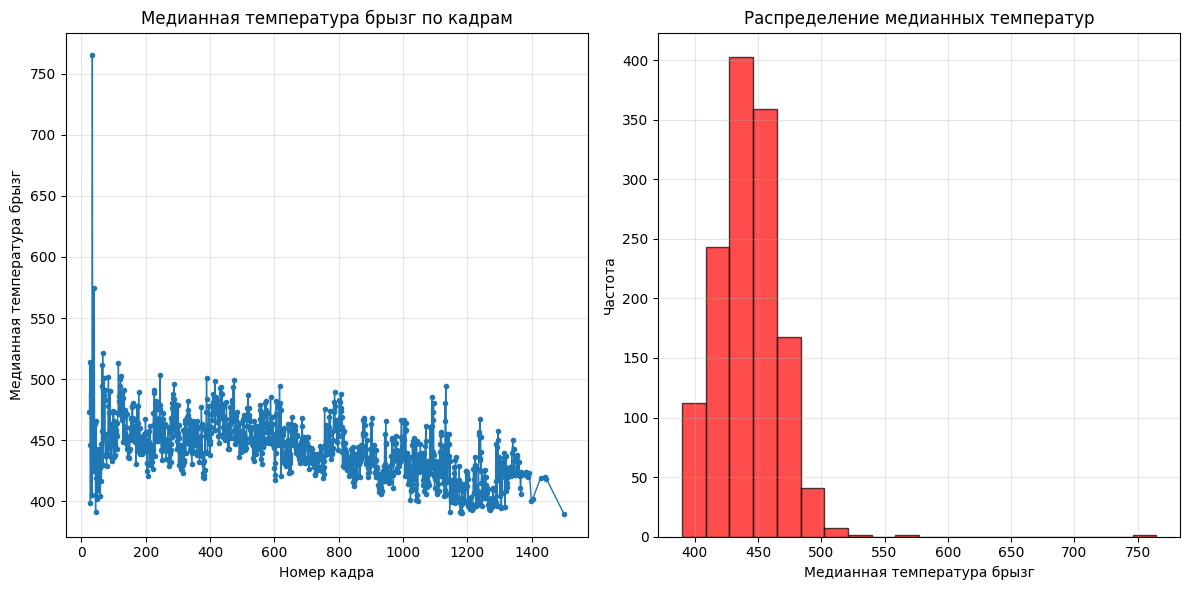

In [ ]:


def calculate_spatters_temperature_stats(cleaned_spatters, frames, thermogram_id=thermogram_id):
    """
    Рассчитывает статистику температур брызг для каждого кадра
    
    Args:
        cleaned_spatters: список массивов брызг по кадрам [cx, cy, w, h]
        frames: исходные кадры с температурными данными
        thermogram_id: номер термограммы (опционально)
    
    Returns:
        DataFrame с температурной статистикой брызг по кадрам
    """
    
    temperature_stats = []
    
    for frame_idx in range(len(cleaned_spatters)):
        frame_spatters = cleaned_spatters[frame_idx]
        frame_data = frames[frame_idx]
        
        if len(frame_spatters) == 0:
            # Если брызг нет, заполняем нулями/NaN
            frame_stats = {
                'frame_number': frame_idx + 1,
                'spatters_count': 0,
                'median_spatter_temperature': np.nan,
                'mean_spatter_temperature': np.nan,
                'std_spatter_temperature': np.nan,
                'min_spatter_temperature': np.nan,
                'max_spatter_temperature': np.nan,
                'total_spatters_pixels': 0
            }
        else:
            spatter_temperatures = []
            total_pixels = 0
            
            for spatter in frame_spatters:
                cx, cy, w, h = spatter.astype(int)
                
                # Вычисляем bounding box брызги
                x_start = max(0, cx - w//2)
                x_end = min(frame_data.shape[1], cx + w//2 + 1)
                y_start = max(0, cy - h//2)
                y_end = min(frame_data.shape[0], cy + h//2 + 1)
                
                # Извлекаем пиксели брызги
                spatter_pixels = frame_data[y_start:y_end, x_start:x_end]
                
                if spatter_pixels.size > 0:
                    # Средняя температура брызги
                    mean_temp = np.mean(spatter_pixels)
                    spatter_temperatures.append(mean_temp)
                    total_pixels += spatter_pixels.size
            
            spatter_temperatures = np.array(spatter_temperatures)
            
            frame_stats = {
                'frame_number': frame_idx + 1,
                'spatters_count': len(frame_spatters),
                'median_spatter_temperature': np.median(spatter_temperatures),
                'mean_spatter_temperature': np.mean(spatter_temperatures),
                'std_spatter_temperature': np.std(spatter_temperatures),
                'min_spatter_temperature': np.min(spatter_temperatures),
                'max_spatter_temperature': np.max(spatter_temperatures),
                'total_spatters_pixels': total_pixels
            }
        
        temperature_stats.append(frame_stats)
    
    df = pd.DataFrame(temperature_stats)
    
    return df

# Использование:
spatters_temperature = calculate_spatters_temperature_stats(cleaned_spatters, frames)